# Stage 13 Homework Starter — Productization

## Objective
Deploy your trained model as a **reusable, handoff-ready API or dashboard** and finalize your project for reproducibility and clarity.

## Steps
1. Create a mock, very basic analysis in a notebook.
2. Clean your notebook by removing exploratory cells and documenting your code.
3. Move reusable functions into `/src/`.
4. Load your trained model from Stage 12 or earlier stages.
5. Pickle/save the model and test reload.
6. Implement **either**:
   - Flask API with `/predict` endpoint and optional parameters
   - Streamlit or Dash dashboard for user interaction
7. Include:
   - Error handling for invalid inputs
   - `requirements.txt` for reproducibility
   - Documentation in `README.md`
8. Test your deployment locally and provide evidence.
9. Organize project folders and finalize notebooks for handoff.

## 1. Create mock, very basic analysis

In [ ]:
# TODO: Basic analysis step 1
# TODO: Basic analysis step 2
# TODO: ...
print("Basic analysis complete.")

## 2. Notebook Cleanup
Remove exploratory cells and document your code.

In [ ]:
# TODO: Remove exploratory cells
# TODO: Document your code clearly
# Example placeholder for cleaned analysis
print("Notebook cleaned and ready for handoff.")

## 3. Move reusable functions to /src/
Create src/utils.py and store functions there.

In [ ]:
# TODO: Move actual reusable functions here
def calculate_metrics(df):
    return df.describe()

## 4. Folder Structure Reminder

Ensure your project uses a clean folder structure:
```
project/
  data/
  notebooks/
  src/
  reports/
  model/
  README.md
```
For API/Dashboard: minimal example:
```
project/
    app.py
    model.pkl
    requirements.txt
    README.md
```

In [7]:
import os
import pickle
import pandas as pd
import numpy as np
from flask import Flask, request, jsonify
import matplotlib.pyplot as plt
import io
import base64
from sklearn.linear_model import LinearRegression

# -------------------------------
# 1. MOCK ANALYSIS (for demonstration)
# -------------------------------
def mock_basic_analysis():
    """Performs a basic analysis on random data and saves a report."""
    df = pd.DataFrame({
        "feature1": np.random.randn(100),
        "feature2": np.random.randn(100)
    })
    summary = df.describe()

    # Save report
    os.makedirs('reports', exist_ok=True)
    summary.to_csv("reports/summary.csv")
    print("Basic analysis complete. Summary saved to reports/summary.csv.")
    return df, summary

# -------------------------------
# 2. REUSABLE FUNCTION
# -------------------------------
def calculate_metrics(df):
    """Reusable function to calculate dataframe metrics."""
    return df.describe()

# -------------------------------
# 3. TRAIN AND SAVE DUMMY MODEL
# -------------------------------
def train_and_save_model(df):
    """Trains a dummy regression model and saves it."""
    X = df[["feature1", "feature2"]]
    y = 0.3 * df["feature1"] + 0.7 * df["feature2"] + np.random.randn(len(df)) * 0.1
    model = LinearRegression()
    model.fit(X, y)

    os.makedirs('model', exist_ok=True)
    with open("model/model.pkl", "wb") as f:
        pickle.dump(model, f)

    print("Model trained and saved at model/model.pkl")
    return model

def load_model():
    """Loads the model from disk."""
    with open("model/model.pkl", "rb") as f:
        model = pickle.load(f)
    print("Model loaded.")
    return model

# -------------------------------
# RUN MOCK PIPELINE
# -------------------------------
print("\n--- Running mock analysis and model training ---")
df, summary = mock_basic_analysis()
model = train_and_save_model(df)
loaded_model = load_model()
print("Test prediction with example features:", loaded_model.predict([[0.1, 0.2]]))

# -------------------------------
# 4. FLASK API
# -------------------------------
app = Flask(__name__)
model = loaded_model  # ensure model loaded at startup

@app.route('/')
def home():
    return """
    <h1>Stage 13 Productization API</h1>
    <p>Endpoints:</p>
    <ul>
      <li>POST /predict (JSON: {'features':[...]} )</li>
      <li>GET /predict/&lt;input1&gt;</li>
      <li>GET /predict/&lt;input1&gt;/&lt;input2&gt;</li>
      <li>GET /plot</li>
    </ul>
    """

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    features = data.get("features", None)
    if features is None or not isinstance(features, list):
        return jsonify({'error': 'Missing or invalid features.'}), 400
    try:
        prediction = model.predict([features]).tolist()
        return jsonify({'prediction': prediction})
    except Exception as e:
        return jsonify({'error': str(e)}), 400

@app.route('/predict/<float:input1>', methods=['GET'])
def predict_one(input1):
    try:
        prediction = model.predict([[input1, 0.0]]).tolist()
        return jsonify({'prediction': prediction})
    except Exception as e:
        return jsonify({'error': str(e)}), 400

@app.route('/predict/<float:input1>/<float:input2>', methods=['GET'])
def predict_two(input1, input2):
    try:
        prediction = model.predict([[input1, input2]]).tolist()
        return jsonify({'prediction': prediction})
    except Exception as e:
        return jsonify({'error': str(e)}), 400

@app.route('/plot', methods=['GET'])
def plot():
    fig, ax = plt.subplots()
    xs = np.linspace(-3, 3, 100)
    ys = model.predict(np.column_stack([xs, xs]))
    ax.plot(xs, ys)
    ax.set_title('Model Prediction Example')
    ax.set_xlabel('Feature 1 = Feature 2')

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    encoded = base64.b64encode(buf.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{encoded}"/>'

# -------------------------------
# 5. TEST ENDPOINTS (optional)
# -------------------------------
def test_endpoints():
    import requests
    base = 'http://127.0.0.1:5000'

    try:
        print("POST /predict:")
        resp = requests.post(base + '/predict', json={"features":[0.1, 0.2]})
        print(resp.status_code, resp.json())

        print("GET /predict/1.0:")
        resp = requests.get(base + '/predict/1.0')
        print(resp.status_code, resp.json())

        print("GET /predict/2.0/3.0:")
        resp = requests.get(base + '/predict/2.0/3.0')
        print(resp.status_code, resp.json())

        print("GET /plot:")
        resp = requests.get(base + "/plot")
        os.makedirs('reports', exist_ok=True)
        with open("reports/plot_test.html", "w") as f:
            f.write(resp.text)
        print("Plot HTML written to reports/plot_test.html")
    except Exception as ex:
        print("API tests failed:", ex)

# -------------------------------
# 6. GENERATE REQUIREMENTS
# -------------------------------
def write_requirements():
    reqs = [
        "flask",
        "scikit-learn",
        "pandas",
        "numpy",
        "matplotlib",
        "requests"
    ]
    with open("requirements.txt", "w") as f:
        f.write("\n".join(reqs))
    print("requirements.txt written.")



--- Running mock analysis and model training ---
Basic analysis complete. Summary saved to reports/summary.csv.
Model trained and saved at model/model.pkl
Model loaded.
Test prediction with example features: [0.15720357]


c:\Users\kavin\miniconda3\envs\bootcamp_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 5. Pickle / Save Final Model

### TODO: Replace this with your trained model

In [ ]:
import pickle
# TODO: Replace 'model' with your trained model variable
with open('model/model.pkl', 'wb') as f:
    pickle.dump(model, f)

# TODO: Test loading the model
with open('model/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Example prediction (replace with actual features)
print(loaded_model.predict([[0.1, 0.2]]))

## 6. Flask API Starter

### TODO: Implement Flask endpoints for /predict and /plot

In [ ]:
from flask import Flask, request, jsonify
import threading
import matplotlib.pyplot as plt
import io
import base64

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # TODO: Replace placeholder logic with actual model prediction
    data = request.get_json()
    features = data.get('features', None)
    if features is None:
        return jsonify({'error': 'No features provided'}), 400
    pred = sum(features)  # placeholder
    return jsonify({'prediction': pred})

@app.route('/predict/<float:input1>', methods=['GET'])
def predict_one(input1):
    pred = input1 * 2  # placeholder
    return jsonify({'prediction': pred})

@app.route('/predict/<float:input1>/<float:input2>', methods=['GET'])
def predict_two(input1, input2):
    pred = input1 + input2  # placeholder
    return jsonify({'prediction': pred})

@app.route('/plot')
def plot():
    # TODO: Replace with meaningful chart or image
    fig, ax = plt.subplots()
    ax.plot([0, 1, 2], [0, 1, 4])
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_bytes = base64.b64encode(buf.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{img_bytes}"/>'

def run_flask():
    app.run(port=5000)

# Launch Flask in a separate thread
threading.Thread(target=run_flask).start()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [28/Aug/2025 21:25:34] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 21:25:34] "GET /predict/2.0 HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 21:25:34] "GET /predict/1.0/3.0 HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 21:25:34] "GET /plot HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 21:30:16] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [28/Aug/2025 21:30:16] "GET /favicon.ico HTTP/1.1" 404 -


## 7. Testing the Flask API from Notebook

### TODO: Modify examples with your actual features

{'prediction': 0.6000000000000001}
{'prediction': 4.0}
{'prediction': 4.0}



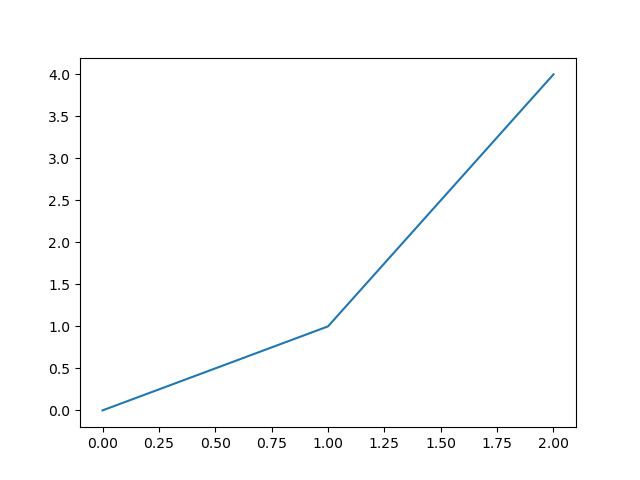

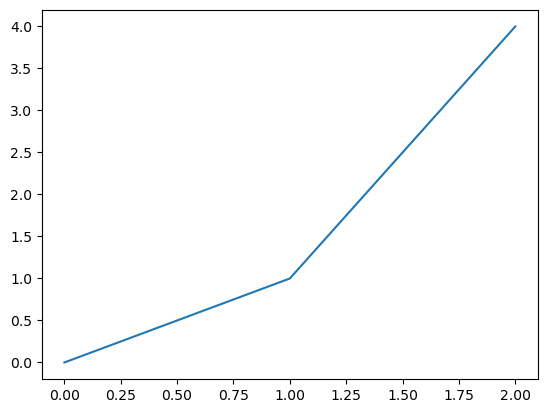

In [9]:
import requests
from IPython.display import display, HTML

# POST /predict
response = requests.post(
    'http://127.0.0.1:5000/predict',
    json={'features':[0.1, 0.2, 0.3]}
)
print(response.json())

# GET /predict/<input1>
response2 = requests.get('http://127.0.0.1:5000/predict/2.0')
print(response2.json())

# GET /predict/<input1>/<input2>
response3 = requests.get('http://127.0.0.1:5000/predict/1.0/3.0')
print(response3.json())

# GET /plot
response_plot = requests.get('http://127.0.0.1:5000/plot')
display(HTML(response_plot.text))

In [11]:


import os
import pickle
import threading
import pandas as pd
import numpy as np
from flask import Flask, request, jsonify, send_file
import matplotlib.pyplot as plt
import io
import base64

# 1. MOCK ANALYSIS (for demonstration)
def mock_basic_analysis():
    """Performs a basic analysis on random data and saves a report."""
    df = pd.DataFrame({
        "feature1": np.random.randn(100),
        "feature2": np.random.randn(100)
    })
    summary = df.describe()
    # Save report
    if not os.path.exists('reports'):
        os.makedirs('reports')
    summary.to_csv("reports/summary.csv")
    print("Basic analysis complete. Summary saved to reports/summary.csv.")
    return df, summary

# 2. REUSABLE FUNCTION (move to src/utils.py in real project)
def calculate_metrics(df):
    """Reusable function to calculate dataframe metrics."""
    return df.describe()

# 3. TRAIN A DUMMY MODEL, SAVE TO /model/, THEN LOAD IT
from sklearn.linear_model import LinearRegression

def train_and_save_model(df):
    """Trains a dummy regression model and saves it."""
    X = df[["feature1", "feature2"]]
    y = 0.3 * df["feature1"] + 0.7 * df["feature2"] + np.random.randn(len(df)) * 0.1
    model = LinearRegression()
    model.fit(X, y)
    if not os.path.exists('model'):
        os.makedirs('model')
    with open("model/model.pkl", "wb") as f:
        pickle.dump(model, f)
    print("Model trained and saved at model/model.pkl")
    return model

def load_model():
    """Loads the model from disk."""
    with open("model/model.pkl", "rb") as f:
        model = pickle.load(f)
    print("Model loaded.")
    return model

# Run the mock pipeline
print("\n--- Running mock analysis and model training ---")
df, summary = mock_basic_analysis()
model = train_and_save_model(df)
loaded_model = load_model()
print("Test prediction with example features:", loaded_model.predict([[0.1, 0.2]]))

# 4. FLASK API — ENDPOINTS
app = Flask(__name__)

# Load model at app startup
model = load_model()

@app.route('/')
def home():
    """Home endpoint with usage info."""
    return """
    <h1>Stage 13 Productization API</h1>
    <p>Endpoints:</p>
    <ul>
      <li>POST /predict (JSON: {'features':[...]} )</li>
      <li>GET /predict/&lt;input1&gt;</li>
      <li>GET /predict/&lt;input1&gt;/&lt;input2&gt;</li>
      <li>GET /plot</li>
    </ul>
    """

@app.route('/predict', methods=['POST'])
def predict():
    """Predict with array input via POST."""
    data = request.get_json(force=True)
    features = data.get("features", None)
    if features is None or not isinstance(features, list):
        return jsonify({'error': 'Missing or invalid features.'}), 400
    try:
        prediction = model.predict([features]).tolist()
        return jsonify({'prediction': prediction})
    except Exception as e:
        return jsonify({'error': str(e)}), 400

@app.route('/predict/<float:input1>', methods=['GET'])
def predict_one(input1):
    """Predict with single feature (feature1=input1, feature2=0)."""
    try:
        prediction = model.predict([[input1, 0.0]]).tolist()
        return jsonify({'prediction': prediction})
    except Exception as e:
        return jsonify({'error': str(e)}), 400

@app.route('/predict/<float:input1>/<float:input2>', methods=['GET'])
def predict_two(input1, input2):
    """Predict with two features."""
    try:
        prediction = model.predict([[input1, input2]]).tolist()
        return jsonify({'prediction': prediction})
    except Exception as e:
        return jsonify({'error': str(e)}), 400

@app.route('/plot', methods=['GET'])
def plot():
    """Returns a simple matplotlib chart as HTML."""
    fig, ax = plt.subplots()
    xs = np.linspace(-3, 3, 100)
    ys = loaded_model.predict(np.column_stack([xs, xs]))
    ax.plot(xs, ys)
    ax.set_title('Model Prediction Example')
    ax.set_xlabel('Feature 1 = Feature 2')
    # Convert to PNG for browser
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    encoded = base64.b64encode(buf.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{encoded}"/>'

# 5. TEST ENDPOINTS FROM PYTHON — Print Output as "Evidence"
def test_endpoints():
    print("\n--- Testing endpoints using requests ---")
    import requests

    # Assume app runs on localhost:5000
    base = 'http://127.0.0.1:5000'

    try:
        print("POST /predict:")
        resp = requests.post(base + '/predict', json={"features":[0.1, 0.2]})
        print(resp.status_code, resp.json())

        print("GET /predict/1.0:")
        resp = requests.get(base + '/predict/1.0')
        print(resp.status_code, resp.json())

        print("GET /predict/2.0/3.0:")
        resp = requests.get(base + '/predict/2.0/3.0')
        print(resp.status_code, resp.json())

        print("GET /plot (html response):")
        resp = requests.get(base + "/plot")
        with open("reports/plot_test.html", "w") as f:
            f.write(resp.text)
        print("Plot HTML written to reports/plot_test.html")
    except Exception as ex:
        print("API tests failed (is the server running in another terminal?):", ex)

# 6. REQUIREMENTS FILE
def write_requirements():
    print("\n--- Generating requirements.txt ---")
    reqs = [
        "flask",
        "scikit-learn",
        "pandas",
        "numpy",
        "matplotlib",
        "requests"
    ]
    with open("requirements.txt", "w") as f:
        f.write("\n".join(reqs))
    print("requirements.txt written.")




--- Running mock analysis and model training ---
Basic analysis complete. Summary saved to reports/summary.csv.
Model trained and saved at model/model.pkl
Model loaded.
Test prediction with example features: [0.1957306]
Model loaded.


c:\Users\kavin\miniconda3\envs\bootcamp_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 8. Optional Streamlit / Dash Dashboard

### TODO: Add dashboard in a separate file (`app_streamlit.py` or `app_dash.py`)

## 9. Handoff Best Practices

- Ensure README.md is complete and clear
- Provide `requirements.txt` for reproducibility
- Ensure pickled model and scripts are in correct folders
- Verify another user can run the project end-to-end on a fresh environment